<a href="https://www.kaggle.com/code/stanxwong/dtsa5509-supervise-learning-final-project?scriptVersionId=182520304" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s4e6/sample_submission.csv
/kaggle/input/playground-series-s4e6/train.csv
/kaggle/input/playground-series-s4e6/test.csv


# Project Introduction

## Overview

This project marks my learning journey in the DTSA 5500 Supervised Learning course. For the final project, I have chosen the Kaggle competition - Classification with Academic Success - because its dataset meets the project requirements.

## Objectives

The primary objective of this project is to compare various supervised machine learning algorithms and evaluate their performance on a real-world dataset. Additionally, this project will demonstrate my data exploration, cleaning, and preprocessing skills. I will show a step-by-step comparison of different algorithms to showcase my understanding and proficiency in applying these techniques. By doing so, I aim to demonstrate my capability to select, implement, and fine-tune different models to achieve the best possible outcomes.

## Model Selection

The models I will explore include:

- Linear Regression
- Multi-Linear Regression
- Logistic Regression
- Decision Trees
- Random Forests

## Expected Outcomes

By the end of this project, I expect to have a comprehensive understanding of the strengths and limitations of various supervised learning algorithms. I will also gain hands-on experience in model selection, training, evaluation, and optimization.

This project is not only for grading purposes but also serves as a part of my data science portfolio.

# Chapter 1: Import All Useful Libraries

To begin our project, i need to import several libraries that will help me with data manipulation, visualization, and the implementation of machine learning algorithms. Below are the essential libraries i may be use:

In [2]:
import pandas as pd; pd.set_option('display.max_columns', 100)
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from tqdm.notebook import tqdm
import re
from functools import partial
from scipy.stats import kurtosis, skew, gmean, mode
import matplotlib.pyplot as plt; plt.style.use('ggplot')
import seaborn as sns
import plotly.express as px
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder, FunctionTransformer, PowerTransformer, PolynomialFeatures
from sklearn.pipeline import make_pipeline, Pipeline, FeatureUnion
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.impute import KNNImputer
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import KFold, StratifiedKFold, train_test_split, GridSearchCV, RepeatedStratifiedKFold, cross_val_score, cross_val_predict, RepeatedKFold
from sklearn.metrics import roc_auc_score, roc_curve, RocCurveDisplay, cohen_kappa_score, log_loss, f1_score, r2_score, accuracy_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import RFE, RFECV
from sklearn.calibration import CalibrationDisplay, CalibratedClassifierCV
from sklearn.inspection import PartialDependenceDisplay, permutation_importance
from sklearn.linear_model import LogisticRegression, RidgeClassifier, Ridge, RidgeCV
from collections import Counter
from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier, StackingClassifier, AdaBoostClassifier
from sklearn.svm import SVC, LinearSVR
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.neural_network import MLPClassifier
import optuna

# Chapter 2 : Data Study and Tranformation
Summary
   - The dataset does not contain any missing values.
   - Feature "Target" is our prediction result. Let's explore the "Target" first:
        - The "Target" feature includes three categories: Enrolled, Dropout, and Graduate with a datatype of object.
   - Check all datatypes of columns:
        - We found that all other features have datatypes of int64 and float64.
        - This means we have to perform data transformation for the "Target" feature.
        - The column name contains space, which may trigger error. It's better to fix it early.

In [3]:
train=pd.read_csv('/kaggle/input/playground-series-s4e6/train.csv', index_col='id')
test=pd.read_csv('/kaggle/input/playground-series-s4e6/test.csv', index_col='id')
submission=pd.read_csv('/kaggle/input/playground-series-s4e6/sample_submission.csv', index_col='id')
train.isnull().sum()
test.isnull().sum()
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 76518 entries, 0 to 76517
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  76518 non-null  int64  
 1   Application mode                                76518 non-null  int64  
 2   Application order                               76518 non-null  int64  
 3   Course                                          76518 non-null  int64  
 4   Daytime/evening attendance                      76518 non-null  int64  
 5   Previous qualification                          76518 non-null  int64  
 6   Previous qualification (grade)                  76518 non-null  float64
 7   Nacionality                                     76518 non-null  int64  
 8   Mother's qualification                          76518 non-null  int64  
 9   Father's qualification                      

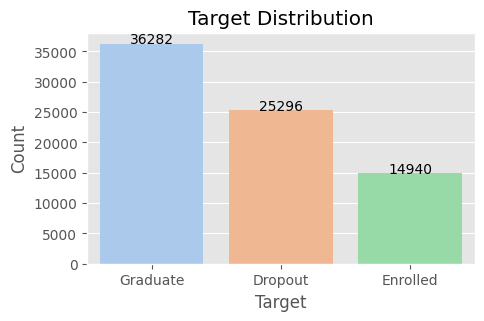

In [4]:
# Target distribution
# Set the figure size and create a count plot 
plt.figure(figsize=(5,3))
ax = sns.countplot(x='Target', data=train, palette='pastel')
# add labels to each bar in the plot
for p in ax.patches:
    ax.text(p.get_x()+p.get_width()/2, p.get_height()+3, f'{int(p.get_height())}', ha="center")
plt.xlabel('Target')
plt.ylabel('Count')
plt.title('Target Distribution')
plt.show()

In [5]:
categories = ['dropout', 'enrolled', 'graduate']
label_encoder = LabelEncoder()
train['Target'] = label_encoder.fit_transform(train['Target'])
train.rename(columns=lambda x: x.replace(' ', '_').replace('(', '').replace(')', ''), inplace=True)
test.rename(columns=lambda x: x.replace(' ', '_').replace('(', '').replace(')', ''), inplace=True)

# Chapter 3 Data Exporation with Visual 
- Correlation Heatmap
- Pairplot (We explore potential relationships between the features and Target )

Summary
 - most correlated features 
     - Curricular_units_2nd_sem_approved (0.8)
     - Curricular_units_2nd_sem_grade (0.7)
     - Curricular_units_1st_sem_approved (0.7)
     - Curricular_units_1st_sem_grade (0.7)
 - least correlated features
     - Unemployment Rate (0.0)
     - Inflation Rate (0.0)
     - Father's qualification (0.0)
     - Mother's occupation (0.0)
     - Father's occupation (0.0)

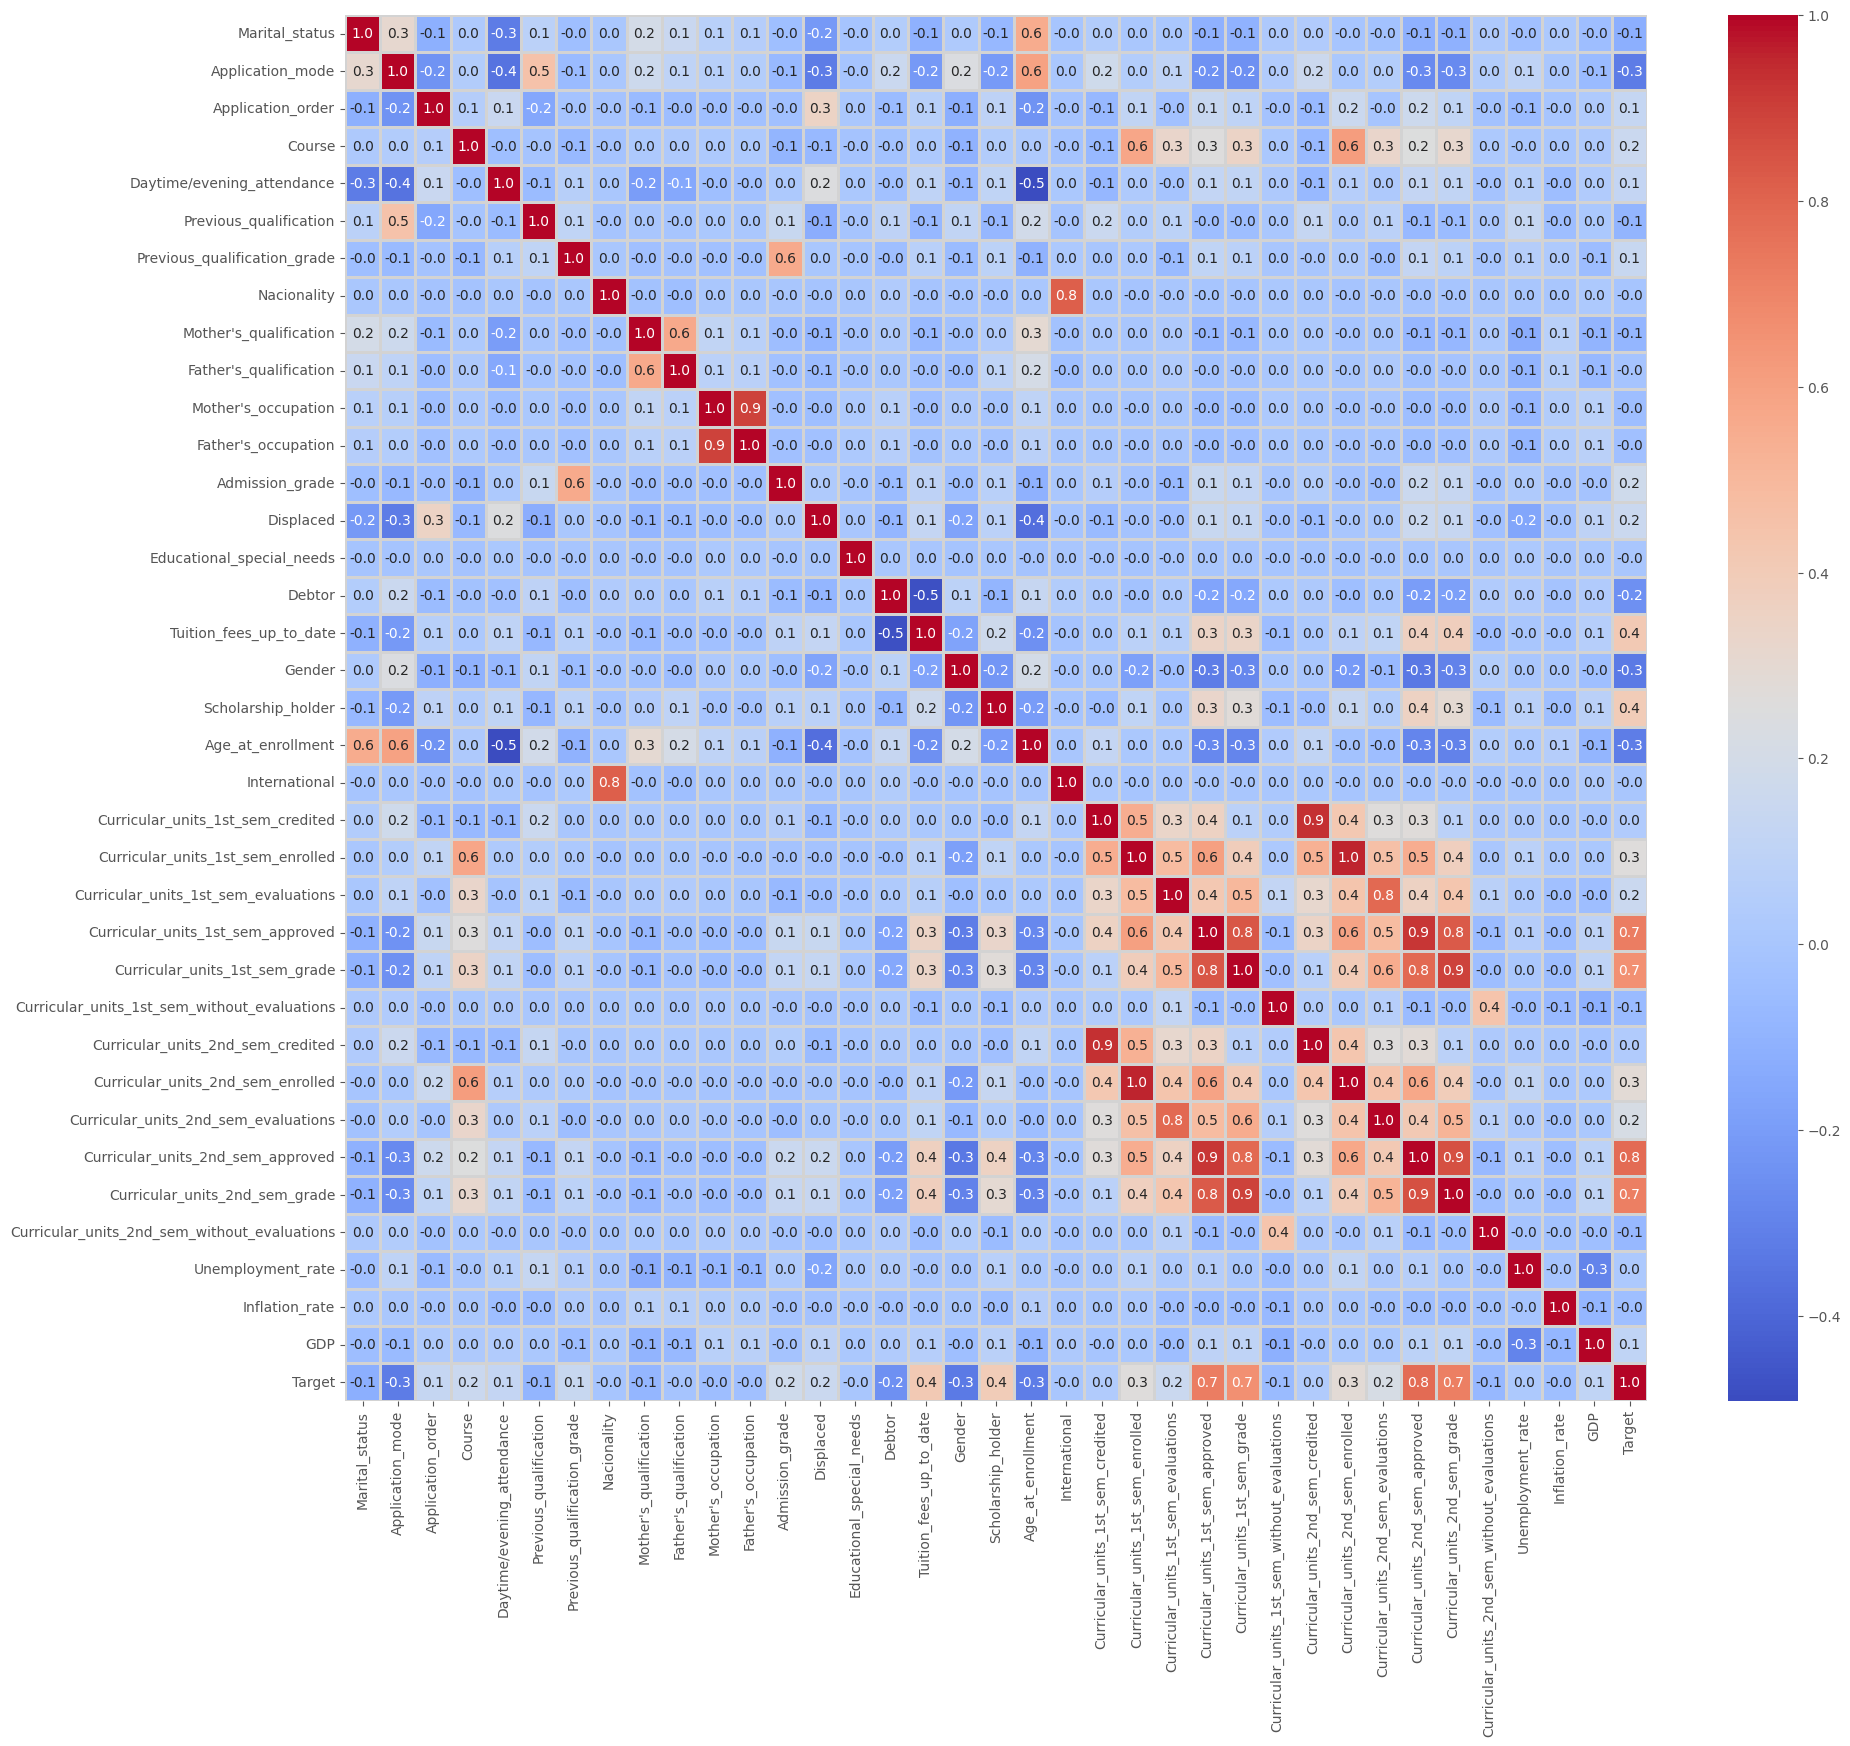

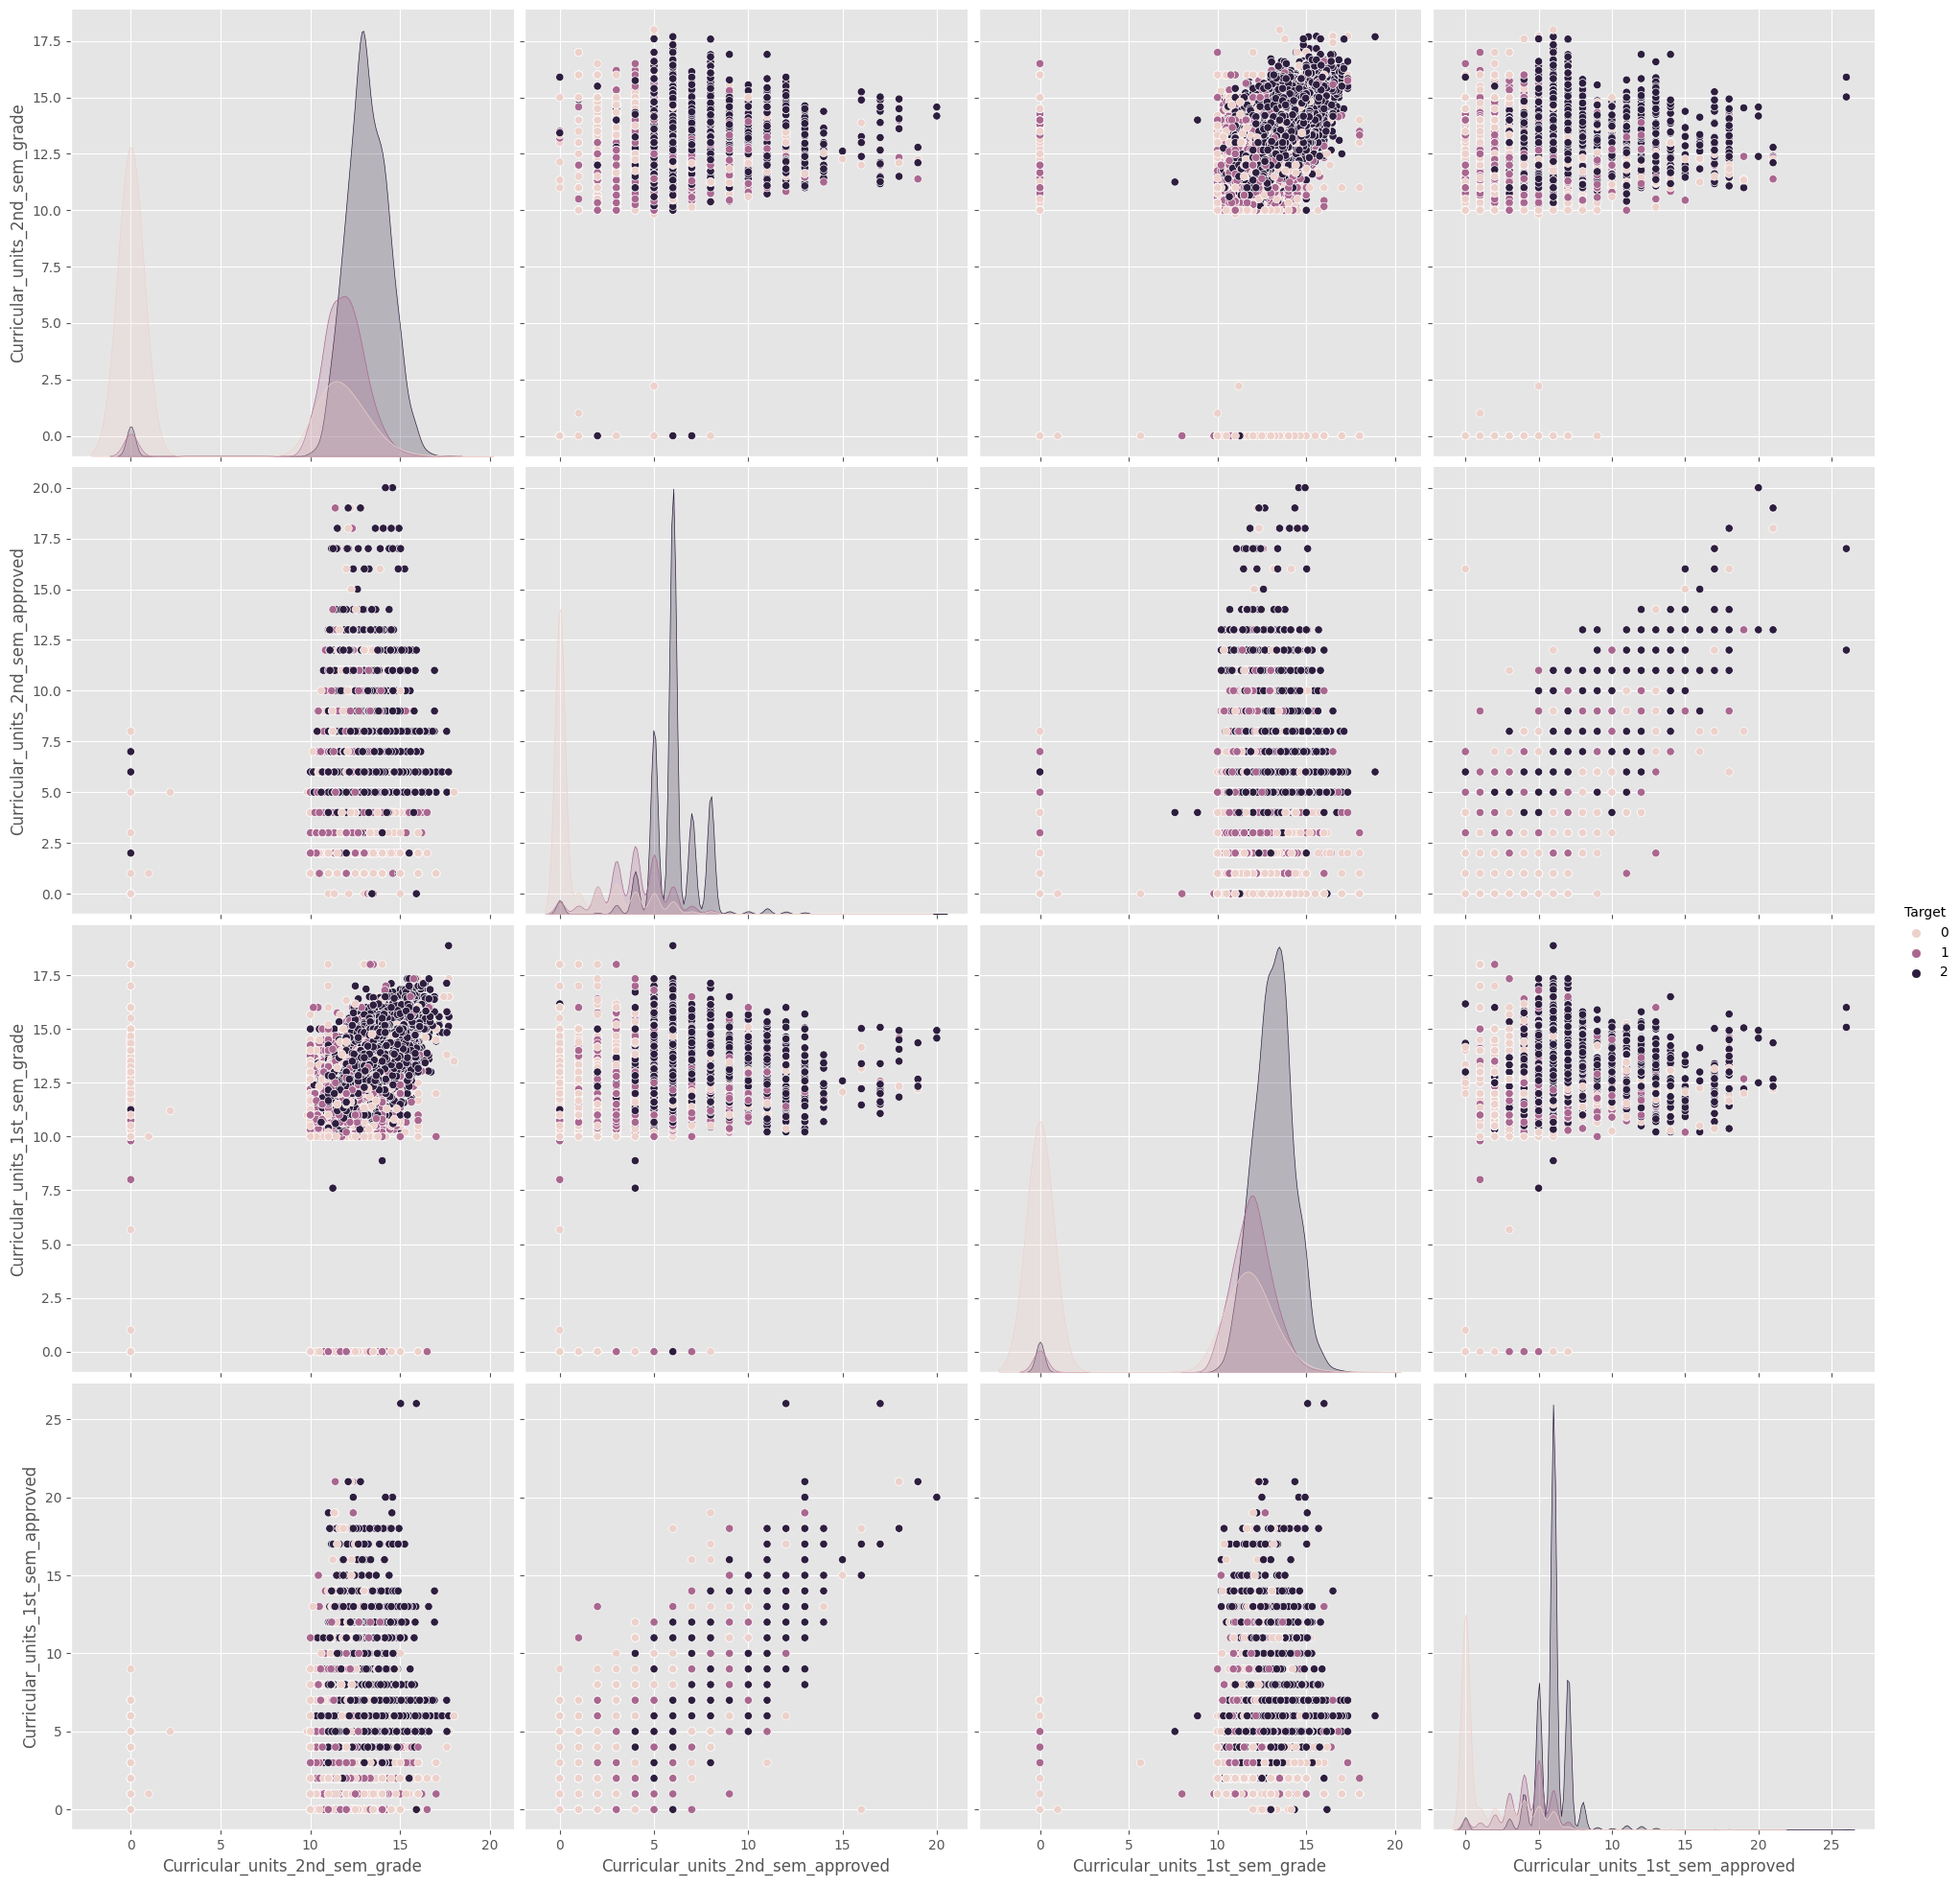

In [6]:
plt.figure(figsize=(21, 18))
sns.heatmap(train.corr(), annot=True, cmap='coolwarm', fmt='.1f', linewidths=2, linecolor='lightgrey')
plt.show()
sns.pairplot(data = train[['Curricular_units_2nd_sem_grade','Curricular_units_2nd_sem_approved','Curricular_units_1st_sem_grade','Curricular_units_1st_sem_approved','Target']], hue = 'Target', height = 5);

# Chapter 4 - Regression Model
Summary 
- Simple Linear Regression
    - Best Degree : 11
    - R squared : 0.6648 
- Polynomial Regression
    - Best Degree : 20
    - R squared : 0.6652
    - Degree 1: R^2 = 1.0000
    - Degree 2: R^2 = 1.0000
    - Sound Degree : 2
    - Remarks : Perfect R^2 values at low degrees (1 and 2) can indicate overfitting, especially if the data has noise.Overfitting happens when the model learns the noise and details in the training data rather than the actual relationship.
- S
    - 1 predictor : 0.611
    - 2 predictor : 0.648
    - 3 predictor : 0.659
    - 4 predictor : 0.670
    - 5 predictor : 0.673
    - 6 predictor : 0.676
    - 7 predictor : 0.678
Conclusion : Above regression models evaluated, particularly polynomial regression, demonstrate inadequate R2 values and potential overfitting issues. Besides,even adding more predictors to a multiple linear regression improves the R-squared value, it still doesn't look good enough.Here is suggestion to looking for another model.
   

In [7]:
import statsmodels.formula.api as smf
import statsmodels.api as sm
# Find the largest absolute correlation with 'Target'
#max_corr_value = target_corr.abs().max()
#max_corr_feature = target_corr.abs().idxmax()
#print(max_corr_feature)
model = smf.ols(formula='Target~Curricular_units_2nd_sem_approved', data=train) 
res = model.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                 Target   R-squared:                       0.611
Model:                            OLS   Adj. R-squared:                  0.611
Method:                 Least Squares   F-statistic:                 1.200e+05
Date:                Mon, 10 Jun 2024   Prob (F-statistic):               0.00
Time:                        07:39:11   Log-Likelihood:                -63180.
No. Observations:               76518   AIC:                         1.264e+05
Df Residuals:                   76516   BIC:                         1.264e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Interc

In [8]:
corr_matrix = train.corr()

# Extract the correlations with the 'Target' column
target_corr = corr_matrix['Target'].drop('Target')  # Drop self-correlation

# Sort the correlations in descending order and get the top 10
top_10_corr = target_corr.abs().sort_values(ascending=False).head(10)
#print(top_10_corr)

# List of variables to test
variables = ['Curricular_units_2nd_sem_approved', 'Curricular_units_1st_sem_approved', 'Curricular_units_2nd_sem_grade', 'Curricular_units_1st_sem_grade', 'Tuition_fees_up_to_date', 'Scholarship_holder', 'Gender', 'Application_mode', 'Age_at_enrollment', 'Curricular_units_2nd_sem_enrolled']

# Dictionary to store results and adjusted R-squared values
model_results = {}
adj_r_squared_values = {}

# Loop through each variable, fit the model, and store the results

for var in variables:
    formula = f'Target ~ {var}'
    model = smf.ols(formula=formula, data=train)
    res = model.fit()
    model_results[var] = res.summary()
    adj_r_squared_values[var] = res.rsquared_adj
    
# Sort adjusted R-squared values from high to low
sorted_adj_r_squared_values = {k: v for k, v in sorted(adj_r_squared_values.items(), key=lambda item: item[1], reverse=True)}
    
print("Adjusted R-squared values for all variables sorted from high to low:")
for var, adj_r2 in sorted_adj_r_squared_values.items():
    print(f"{var}: {adj_r2:.4f}")

Adjusted R-squared values for all variables sorted from high to low:
Curricular_units_2nd_sem_approved: 0.6107
Curricular_units_1st_sem_approved: 0.5263
Curricular_units_2nd_sem_grade: 0.5170
Curricular_units_1st_sem_grade: 0.4374
Tuition_fees_up_to_date: 0.1728
Scholarship_holder: 0.1553
Gender: 0.1090
Application_mode: 0.1055
Age_at_enrollment: 0.1028
Curricular_units_2nd_sem_enrolled: 0.0836


In [9]:
# N = 15 
r_squared = {}

# fit polynomial models for degrees 1 through 15
for degree in range(1, 16):
    
    # Start with the base formula and add polynomial terms up to the current degree
    
    terms = ' + '.join(f'np.power(Curricular_units_2nd_sem_approved, {i})' for i in range(1, degree + 1))
    formula = f'Target ~ {terms}'
    
    # Fit the model using the constructed formula
    
    model = smf.ols(formula, data=train).fit()
    
    # Store the R^2 of the model in the dictionary

    r_squared[degree] = model.rsquared

# Determine the degree with the highest R^2    
best_degree = max(r_squared, key=r_squared.get)

# Get the maximum R^2 value
best_r_squared =r_squared[best_degree]

print(best_degree)
print(best_r_squared)

11
0.6648329515386553


In [10]:
# 'Curricular_units_2nd_sem_approved' Normalized by the mean value 
# = 30
train['C_2nd_norm'] = train['Curricular_units_2nd_sem_approved']/train['Curricular_units_2nd_sem_approved'].mean()

r_squared = {}

for degree in range(1, 31):
    
    # Start with the base formula and add polynomial terms up to the current degree
    
    terms = ' + '.join(f'np.power(C_2nd_norm, {i})' for i in range(1, degree + 1))
    formula = f'Target ~ {terms}'
    
    # Fit the model using the constructed formula
    
    model = smf.ols(formula, data=train).fit()
    
    # Store the R^2 of the model in the dictionary

    r_squared[degree] = model.rsquared

# Determine the degree with the highest R^2    
best_degree = max(r_squared, key=r_squared.get)

# Get the maximum R^2 value
best_r_squared =r_squared[best_degree]

print(best_degree)
print(best_r_squared)

# Sound Degree

y = train['Curricular_units_2nd_sem_approved']

sound_degree = None
for degree in range(1, 21):
    # Create polynomial features manually
    X_poly = np.vander(train['C_2nd_norm'], N=degree+1, increasing=True)
    
    # Fit the OLS model
    model = sm.OLS(y, X_poly).fit()
    
    # Check if all coefficients are significant
    if np.all(model.pvalues < 0.05):  # Check if all p-values are less than 0.05
        sound_degree = degree
    else:
        break  # Stop if any coefficient becomes non-significant

    # Printing each degree's R^2 for review
    print(f"Degree {degree}: R^2 = {model.rsquared:.4f}")

print(sound_degree)

20
0.6651779606805794
Degree 1: R^2 = 1.0000
Degree 2: R^2 = 1.0000
2


                            OLS Regression Results                            
Dep. Variable:                 Target   R-squared:                       0.620
Model:                            OLS   Adj. R-squared:                  0.620
Method:                 Least Squares   F-statistic:                 3.118e+04
Date:                Mon, 10 Jun 2024   Prob (F-statistic):               0.00
Time:                        07:39:22   Log-Likelihood:                -62272.
No. Observations:               76518   AIC:                         1.246e+05
Df Residuals:                   76513   BIC:                         1.246e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Interc

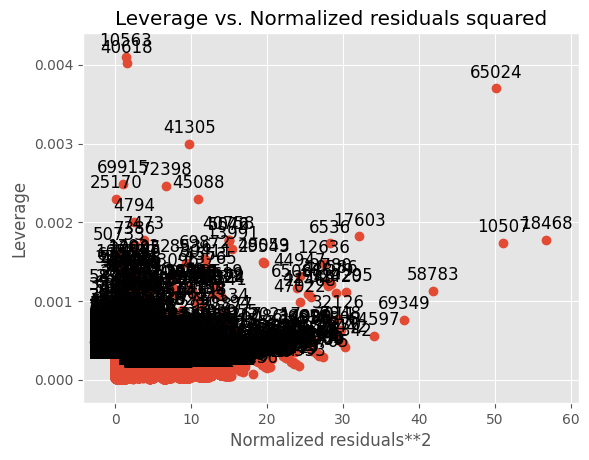

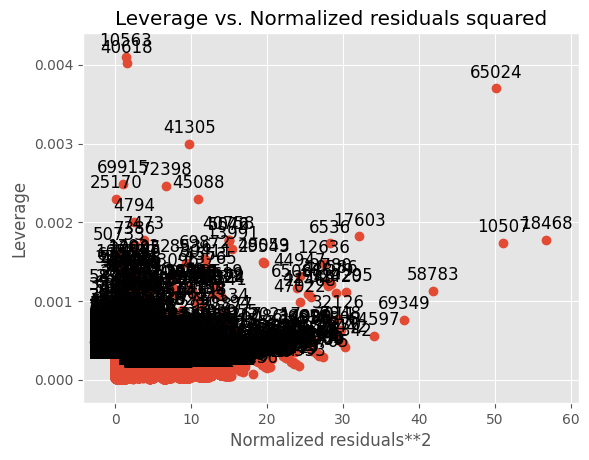

In [11]:
model_multi_train = smf.ols('Target ~ Curricular_units_2nd_sem_approved + Curricular_units_1st_sem_approved + Curricular_units_2nd_sem_grade + Curricular_units_1st_sem_grade', data=train).fit()
print(model_multi_train.summary())
sm.graphics.plot_leverage_resid2(model_multi_train)

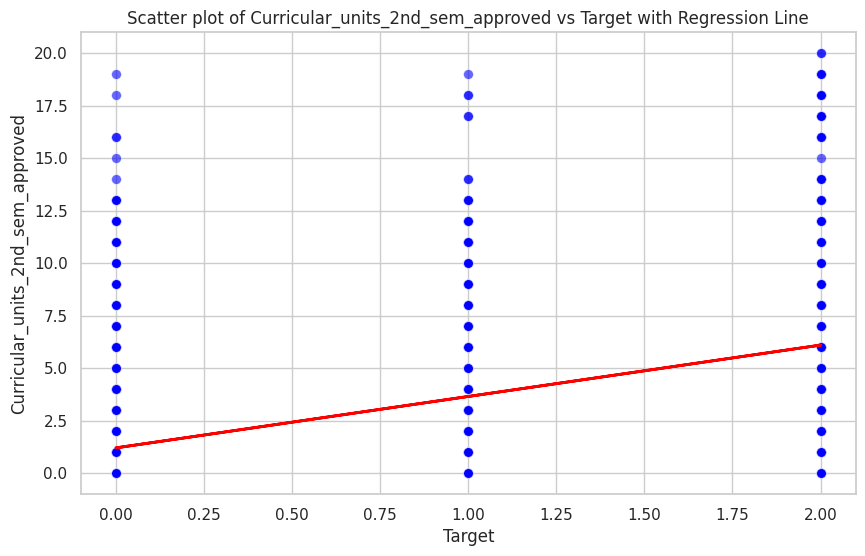

In [12]:
# plot regression model 
# properly label the scatterplot axs and show the regression line 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

# Scatter plot
sns.scatterplot(x='Target', y='Curricular_units_2nd_sem_approved', data=train, s=50, color='blue', alpha=0.6)

# Fit regression model
X = train[['Target']]
y = train['Curricular_units_2nd_sem_approved']
Target = LinearRegression()
Target.fit(X, y)
y_pred = Target.predict(X)

# Plot regression line
plt.plot(train['Target'], y_pred, color='red', linewidth=2)

# Labels and title
plt.xlabel('Target')
plt.ylabel('Curricular_units_2nd_sem_approved')
plt.title('Scatter plot of Curricular_units_2nd_sem_approved vs Target with Regression Line')
plt.show()


In [13]:
#2C - Forward Stepwise Refinement
allowed_factors = ['Curricular_units_2nd_sem_approved','Curricular_units_1st_sem_approved','Curricular_units_2nd_sem_grade','Curricular_units_1st_sem_grade',
'Tuition_fees_up_to_date','Scholarship_holder','Gender','Application_mode','Age_at_enrollment','Curricular_units_2nd_sem_enrolled']

best = ['',0]
for p in allowed_factors:
    model  = smf.ols(formula='Target~'+p, data=train).fit()
    print(p, model.rsquared)
    if model.rsquared>best[1]:
        best = [p, model.rsquared]
print('best:',best)
train_target1 = smf.ols(f'Target ~ {best[0]}', data=train).fit()
print(train_target1.summary())

Curricular_units_2nd_sem_approved 0.6106679163015726
Curricular_units_1st_sem_approved 0.5263362561338178
Curricular_units_2nd_sem_grade 0.5170122668284947
Curricular_units_1st_sem_grade 0.43739090647017376
Tuition_fees_up_to_date 0.17279880308724216
Scholarship_holder 0.1553340341260666
Gender 0.10901931450186442
Application_mode 0.10551473234367692
Age_at_enrollment 0.10283521351897007
Curricular_units_2nd_sem_enrolled 0.08361634019621977
best: ['Curricular_units_2nd_sem_approved', 0.6106679163015726]
                            OLS Regression Results                            
Dep. Variable:                 Target   R-squared:                       0.611
Model:                            OLS   Adj. R-squared:                  0.611
Method:                 Least Squares   F-statistic:                 1.200e+05
Date:                Mon, 10 Jun 2024   Prob (F-statistic):               0.00
Time:                        07:41:08   Log-Likelihood:                -63180.
No. Observations:

In [14]:
# Conduct the algorothm above for k=2
from itertools import combinations
best = ['', 0]
for combo in combinations(allowed_factors, 2):
    formula = 'Target ~ ' + ' + '.join(combo)
    model = smf.ols(formula=formula, data=train).fit()
    #print(combo, model.rsquared)
    if model.rsquared > best[1]:
        best = [combo, model.rsquared]

#print('Best combination:', best[0], 'with R^2:', best[1])

train_target2 = smf.ols(f'Target ~ {" + ".join(best[0])}', data=train).fit()
print(train_target2.summary())

                            OLS Regression Results                            
Dep. Variable:                 Target   R-squared:                       0.648
Model:                            OLS   Adj. R-squared:                  0.648
Method:                 Least Squares   F-statistic:                 7.041e+04
Date:                Mon, 10 Jun 2024   Prob (F-statistic):               0.00
Time:                        07:41:10   Log-Likelihood:                -59330.
No. Observations:               76518   AIC:                         1.187e+05
Df Residuals:                   76515   BIC:                         1.187e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Interc

In [15]:
# Conduct the algorothm above for k=3
from itertools import combinations
best = ['', 0]
for combo in combinations(allowed_factors, 3):
    formula = 'Target ~ ' + ' + '.join(combo)
    model = smf.ols(formula=formula, data=train).fit()
    #print(combo, model.rsquared)
    if model.rsquared > best[1]:
        best = [combo, model.rsquared]

#print('Best combination:', best[0], 'with R^2:', best[1])

train_target3 = smf.ols(f'Target ~ {" + ".join(best[0])}', data=train).fit()
print(train_target3.summary())

                            OLS Regression Results                            
Dep. Variable:                 Target   R-squared:                       0.659
Model:                            OLS   Adj. R-squared:                  0.659
Method:                 Least Squares   F-statistic:                 4.938e+04
Date:                Mon, 10 Jun 2024   Prob (F-statistic):               0.00
Time:                        07:41:16   Log-Likelihood:                -58060.
No. Observations:               76518   AIC:                         1.161e+05
Df Residuals:                   76514   BIC:                         1.162e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Interc

In [16]:
# Conduct the algorothm above for k=4
from itertools import combinations
best = ['', 0]
for combo in combinations(allowed_factors, 4):
    formula = 'Target ~ ' + ' + '.join(combo)
    model = smf.ols(formula=formula, data=train).fit()
    #print(combo, model.rsquared)
    if model.rsquared > best[1]:
        best = [combo, model.rsquared]

#print('Best combination:', best[0], 'with R^2:', best[1])

train_target4 = smf.ols(f'Target ~ {" + ".join(best[0])}', data=train).fit()
print(train_target4.summary())

                            OLS Regression Results                            
Dep. Variable:                 Target   R-squared:                       0.670
Model:                            OLS   Adj. R-squared:                  0.670
Method:                 Least Squares   F-statistic:                 3.889e+04
Date:                Mon, 10 Jun 2024   Prob (F-statistic):               0.00
Time:                        07:41:28   Log-Likelihood:                -56820.
No. Observations:               76518   AIC:                         1.136e+05
Df Residuals:                   76513   BIC:                         1.137e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Interc

In [17]:
# Conduct the algorothm above for k=5
from itertools import combinations
best = ['', 0]
for combo in combinations(allowed_factors, 5):
    formula = 'Target ~ ' + ' + '.join(combo)
    model = smf.ols(formula=formula, data=train).fit()
    #print(combo, model.rsquared)
    if model.rsquared > best[1]:
        best = [combo, model.rsquared]

#print('Best combination:', best[0], 'with R^2:', best[1])

train_target5 = smf.ols(f'Target ~ {" + ".join(best[0])}', data=train).fit()
print(train_target5.summary())

                            OLS Regression Results                            
Dep. Variable:                 Target   R-squared:                       0.673
Model:                            OLS   Adj. R-squared:                  0.673
Method:                 Least Squares   F-statistic:                 3.152e+04
Date:                Mon, 10 Jun 2024   Prob (F-statistic):               0.00
Time:                        07:41:46   Log-Likelihood:                -56482.
No. Observations:               76518   AIC:                         1.130e+05
Df Residuals:                   76512   BIC:                         1.130e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Interc

In [18]:
# Conduct the algorothm above for k=6
from itertools import combinations
best = ['', 0]
for combo in combinations(allowed_factors, 6):
    formula = 'Target ~ ' + ' + '.join(combo)
    model = smf.ols(formula=formula, data=train).fit()
    #print(combo, model.rsquared)
    if model.rsquared > best[1]:
        best = [combo, model.rsquared]

#print('Best combination:', best[0], 'with R^2:', best[1])

train_target6 = smf.ols(f'Target ~ {" + ".join(best[0])}', data=train).fit()
print(train_target6.summary())

                            OLS Regression Results                            
Dep. Variable:                 Target   R-squared:                       0.676
Model:                            OLS   Adj. R-squared:                  0.676
Method:                 Least Squares   F-statistic:                 2.656e+04
Date:                Mon, 10 Jun 2024   Prob (F-statistic):               0.00
Time:                        07:42:02   Log-Likelihood:                -56202.
No. Observations:               76518   AIC:                         1.124e+05
Df Residuals:                   76511   BIC:                         1.125e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Interc

In [19]:
# Conduct the algorothm above for k=7
from itertools import combinations
best = ['', 0]
for combo in combinations(allowed_factors, 7):
    formula = 'Target ~ ' + ' + '.join(combo)
    model = smf.ols(formula=formula, data=train).fit()
    #print(combo, model.rsquared)
    if model.rsquared > best[1]:
        best = [combo, model.rsquared]

#print('Best combination:', best[0], 'with R^2:', best[1])

train_target7 = smf.ols(f'Target ~ {" + ".join(best[0])}', data=train).fit()
print(train_target7.summary())

                            OLS Regression Results                            
Dep. Variable:                 Target   R-squared:                       0.678
Model:                            OLS   Adj. R-squared:                  0.678
Method:                 Least Squares   F-statistic:                 2.297e+04
Date:                Mon, 10 Jun 2024   Prob (F-statistic):               0.00
Time:                        07:42:13   Log-Likelihood:                -55966.
No. Observations:               76518   AIC:                         1.119e+05
Df Residuals:                   76510   BIC:                         1.120e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Interc

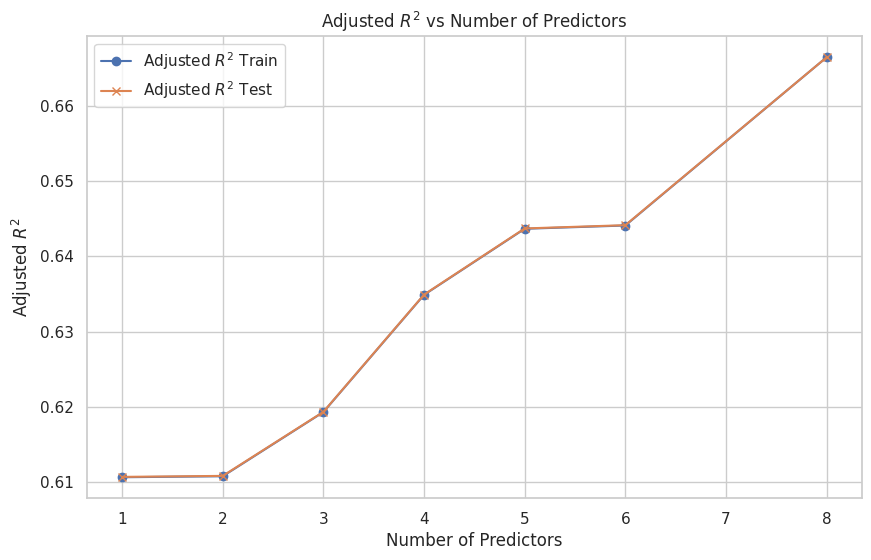

In [20]:
# plot resulting adjusted rsquared vs number of predictors (k=1,2,3,4,5,6,7,8)
# overlay the adjusted rsquared for the test data 
train_s, test_s = train_test_split(train, train_size=50, random_state=0)

predictors = ['Curricular_units_2nd_sem_approved', 'Curricular_units_1st_sem_approved', 'Curricular_units_2nd_sem_grade', 'Tuition_fees_up_to_date', 'Application_mode','Age_at_enrollment','Curricular_units_2nd_sem_enrolled']

adjr2_train = []
adjr2_test = []

for k in range(1, 8):
    # Construct the formula with k predictors
    formula = 'Target ~ ' + ' + '.join(predictors[:k])
    
    # Fit the model on training data
    model = sm.OLS.from_formula(formula, train).fit()
    adjr2_train.append(model.rsquared_adj)
    
    # Evaluate the model on test data
    test_pred = model.predict(test_s[predictors[:k]])
    # Calculate adjusted R-squared for test data
    ss_res = np.sum((test_s['Target'] - test_pred) ** 2)
    ss_tot = np.sum((test_s['Target'] - np.mean(test_s['Target'])) ** 2)
    if ss_tot != 0:
        r_squared = 1 - (float(ss_res) / ss_tot)
    else:
        r_squared = np.nan 
    r_squared = 1 - (float(ss_res)) / ss_tot
    n = len(test_s)
    p = k

    if n - p - 1 != 0:
        adjr2_test.append(1 - (1 - r_squared) * (n - 1) / (n - p - 1))
    else:
        adjr2_test.append(np.nan) 
k_values = [1, 2, 3, 4, 5, 6, 8]
        
plt.figure(figsize=(10, 6))
plt.plot(k_values, adjr2_train, label='Adjusted $R^2$ Train', marker='o')
plt.plot(k_values, adjr2_test, label='Adjusted $R^2$ Test', marker='x')
plt.title('Adjusted $R^2$ vs Number of Predictors')
plt.xlabel('Number of Predictors')
plt.ylabel('Adjusted $R^2$')
plt.legend()
plt.grid(True)
plt.show()

# Chapter 4 - Ensemble methods
Summary 
- Random Forest - Average Validation Accuracy: 0.8272824642296724
- Adaptive Boosting (AdaBoost)- Average Validation Accuracy: 0.8189707494272996
- Gradient Boosting - Average Validation Accuracy: 0.8269295930963179

Conclusion 
- Here is a suggested to use Random Forest to predict the academic success.

More
- May be reducing low-correlation features might improve the model's average performance.
- After delete the features correlation < 0.1
- Random Forest : 0.8238192251039415
- AdaBoost Boosting : 0.818657088854656
- Gradient Boosting ：0.825570409807409
- Result : No any improve.

In [21]:
initial_features = list(test.columns)
X_train = train[initial_features]
y_train = train['Target']
X_test = test[initial_features]

In [22]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

def cross_validate_model(model, X_train, y_train, params, n_splits=10):
    """
    Performs K-Fold cross-validation for a given model, returns the last model and average validation accuracy.

    Parameters:
        model: Machine learning model class (e.g., RandomForestClassifier)
        X_train: Training feature dataset
        y_train: Training target dataset
        params: Dictionary of parameters to initialize the model
        n_splits: Number of folds for cross-validation (default: 10)

    Returns:
        last_model: The last trained model instance
        average_val_accuracy: Average validation accuracy over all folds
    """
    # Initialize variables
    cv = KFold(n_splits=n_splits, shuffle=True, random_state=0)
    val_scores = []

    # Cross-validation loop
    for fold, (train_ind, valid_ind) in enumerate(cv.split(X_train)):
        # Data splitting
        X_fold_train = X_train.iloc[train_ind]
        y_fold_train = y_train.iloc[train_ind]
        X_val = X_train.iloc[valid_ind]
        y_val = y_train.iloc[valid_ind]
        
        # Model initialization and training
        clf = model(**params)
        clf.fit(X_fold_train, y_fold_train)
        
        # Predict and evaluate
        y_pred_trn = clf.predict(X_fold_train)
        y_pred_val = clf.predict(X_val)
        train_acc = accuracy_score(y_fold_train, y_pred_trn)
        val_acc = accuracy_score(y_val, y_pred_val)
        print(f"Fold: {fold}, Train Accuracy: {train_acc:.5f}, Val Accuracy: {val_acc:.5f}")
        print("-" * 50)
        
        # Accumulate validation scores
        val_scores.append(val_acc)

    # Calculate the average validation score
    average_val_accuracy = np.mean(val_scores)
    print("Average Validation Accuracy:", average_val_accuracy)

    return clf, average_val_accuracy

In [23]:
print('Random Forest Cross-Validation Results:\n')
rf_model, rf_mean_accuracy = cross_validate_model(RandomForestClassifier, X_train, y_train, params={})

Random Forest Cross-Validation Results:

Fold: 0, Train Accuracy: 0.99996, Val Accuracy: 0.82567
--------------------------------------------------
Fold: 1, Train Accuracy: 1.00000, Val Accuracy: 0.82292
--------------------------------------------------
Fold: 2, Train Accuracy: 0.99999, Val Accuracy: 0.82541
--------------------------------------------------
Fold: 3, Train Accuracy: 0.99997, Val Accuracy: 0.82057
--------------------------------------------------
Fold: 4, Train Accuracy: 1.00000, Val Accuracy: 0.82318
--------------------------------------------------
Fold: 5, Train Accuracy: 0.99997, Val Accuracy: 0.83312
--------------------------------------------------
Fold: 6, Train Accuracy: 0.99999, Val Accuracy: 0.82998
--------------------------------------------------
Fold: 7, Train Accuracy: 0.99996, Val Accuracy: 0.83351
--------------------------------------------------
Fold: 8, Train Accuracy: 0.99999, Val Accuracy: 0.82342
-----------------------------------------------

In [24]:
print('AdaBoost Cross-Validation Results:\n')
ada_model, ada_mean_accuracy = cross_validate_model(AdaBoostClassifier, X_train, y_train, params={})

AdaBoost Cross-Validation Results:

Fold: 0, Train Accuracy: 0.81924, Val Accuracy: 0.81600
--------------------------------------------------
Fold: 1, Train Accuracy: 0.81945, Val Accuracy: 0.81639
--------------------------------------------------
Fold: 2, Train Accuracy: 0.81873, Val Accuracy: 0.81652
--------------------------------------------------
Fold: 3, Train Accuracy: 0.81939, Val Accuracy: 0.81390
--------------------------------------------------
Fold: 4, Train Accuracy: 0.81916, Val Accuracy: 0.81260
--------------------------------------------------
Fold: 5, Train Accuracy: 0.81802, Val Accuracy: 0.82423
--------------------------------------------------
Fold: 6, Train Accuracy: 0.81968, Val Accuracy: 0.82436
--------------------------------------------------
Fold: 7, Train Accuracy: 0.81962, Val Accuracy: 0.82397
--------------------------------------------------
Fold: 8, Train Accuracy: 0.81993, Val Accuracy: 0.82055
--------------------------------------------------
F

In [25]:
print('Gradient Boosting Cross-Validation Results:\n')
gb_model, gb_mean_accuracy = cross_validate_model(GradientBoostingClassifier, X_train, y_train, params={})

Gradient Boosting Cross-Validation Results:

Fold: 0, Train Accuracy: 0.83019, Val Accuracy: 0.82658
--------------------------------------------------
Fold: 1, Train Accuracy: 0.83064, Val Accuracy: 0.82279
--------------------------------------------------
Fold: 2, Train Accuracy: 0.83083, Val Accuracy: 0.82371
--------------------------------------------------
Fold: 3, Train Accuracy: 0.83134, Val Accuracy: 0.82122
--------------------------------------------------
Fold: 4, Train Accuracy: 0.83103, Val Accuracy: 0.82135
--------------------------------------------------
Fold: 5, Train Accuracy: 0.82979, Val Accuracy: 0.83521
--------------------------------------------------
Fold: 6, Train Accuracy: 0.83037, Val Accuracy: 0.83129
--------------------------------------------------
Fold: 7, Train Accuracy: 0.82979, Val Accuracy: 0.83455
--------------------------------------------------
Fold: 8, Train Accuracy: 0.83031, Val Accuracy: 0.82656
-------------------------------------------

In [26]:
def plot_feature_importances(model, model_name, color_scale='Reds', dataframe=None):
    """
    Plots feature importances of a fitted random forest model.

    Parameters:
    model (RandomForest model): The trained random forest model.
    color_scale (str): Color scale for the plot.
    dataframe (pd.DataFrame): DataFrame used to train the model. Must not be None.

    Returns:
    Plotly Figure: A plot showing feature importances.
    """
    if dataframe is None:
        raise ValueError("Dataframe cannot be None and must contain the feature names.")

    # Extracting feature importances and sorting them
    importances = model.feature_importances_
    indices = np.argsort(importances)[::-1]
    feature_names = dataframe.columns

    # Creating a DataFrame for the importances
    feature_importances = pd.DataFrame({
        'Feature': feature_names[indices],
        'Importance': importances[indices]
    })

    # Plotting the feature importances
    fig = px.bar(feature_importances.sort_values('Importance', ascending=True), 
                 x='Importance', 
                 y='Feature',
                 title=f"Feature Importances in {model_name}",
                 labels={'Importance': 'Importance', 'Feature': 'Feature'},
                 height=1400,
                 color='Importance',
                 color_continuous_scale=color_scale)

    fig.update_layout(xaxis_title='Importance', yaxis_title='Feature')

    return fig

In [27]:
accuracy = pd.DataFrame({
    'Model': ['Random Forest', 'AdaBoost', 'Gradient Boosting'],
    'Score': [rf_mean_accuracy, ada_mean_accuracy, gb_mean_accuracy]
})

accuracy_sorted = accuracy.sort_values(by='Score', ascending=False)
accuracy_sorted

,Model,Score
2,Gradient Boosting,0.826917
0,Random Forest,0.826172
1,AdaBoost,0.818971


In [28]:
fig = px.bar(data_frame=accuracy_sorted, x='Score', y='Model', color='Score',
             title='Accuracy Comparison', text='Score')
fig.update_layout(width=600, height=500)
fig.show()

In [29]:
model_name = 'Random Forest'
fig = plot_feature_importances(rf_model, model_name, 'Rainbow', X_train)
fig.show()

In [30]:
model_name = 'AdaBoost'
fig = plot_feature_importances(ada_model, model_name, 'Rainbow', X_train)
fig.show()

In [31]:
model_name = 'Gradient Boosting'
fig = plot_feature_importances(gb_model, model_name, 'Rainbow', X_train)
fig.show()

In [32]:
import pandas as pd
import numpy as np

# Assume X_train and y_train are your training data as pandas DataFrame and Series
# Calculate correlations
correlations = X_train.apply(lambda x: np.corrcoef(x, y_train)[0, 1])

# Identify low correlation features
low_correlation_threshold = 0.1
low_corr_features = correlations[correlations.abs() < low_correlation_threshold].index

# Drop low correlation features and save the new DataFrame
X_train_reduced = X_train.drop(columns=low_corr_features)

# Save the resulting DataFrame to a new variable or a file if needed
# For example, if you want to save it to a CSV file:
X_train_reduced.to_csv('X_train_reduced.csv', index=False)

# Print the reduced DataFrame to verify
# print(X_train_reduced.head())
# X_train_reduced.info()

In [33]:
print('Random Forest Cross-Validation Results:\n')
rf_model, rf_mean_accuracy = cross_validate_model(RandomForestClassifier, X_train_reduced, y_train, params={})

Random Forest Cross-Validation Results:

Fold: 0, Train Accuracy: 0.99935, Val Accuracy: 0.82214
--------------------------------------------------
Fold: 1, Train Accuracy: 0.99940, Val Accuracy: 0.82031
--------------------------------------------------
Fold: 2, Train Accuracy: 0.99933, Val Accuracy: 0.82148
--------------------------------------------------
Fold: 3, Train Accuracy: 0.99942, Val Accuracy: 0.82044
--------------------------------------------------
Fold: 4, Train Accuracy: 0.99932, Val Accuracy: 0.81639
--------------------------------------------------
Fold: 5, Train Accuracy: 0.99943, Val Accuracy: 0.83037
--------------------------------------------------
Fold: 6, Train Accuracy: 0.99940, Val Accuracy: 0.82841
--------------------------------------------------
Fold: 7, Train Accuracy: 0.99936, Val Accuracy: 0.83076
--------------------------------------------------
Fold: 8, Train Accuracy: 0.99943, Val Accuracy: 0.82133
-----------------------------------------------

In [34]:
print('AdaBoost Cross-Validation Results:\n')
ada_model, ada_mean_accuracy = cross_validate_model(AdaBoostClassifier, X_train_reduced, y_train, params={})

AdaBoost Cross-Validation Results:

Fold: 0, Train Accuracy: 0.81840, Val Accuracy: 0.81743
--------------------------------------------------
Fold: 1, Train Accuracy: 0.81879, Val Accuracy: 0.81482
--------------------------------------------------
Fold: 2, Train Accuracy: 0.81894, Val Accuracy: 0.81299
--------------------------------------------------
Fold: 3, Train Accuracy: 0.81837, Val Accuracy: 0.81430
--------------------------------------------------
Fold: 4, Train Accuracy: 0.81833, Val Accuracy: 0.81613
--------------------------------------------------
Fold: 5, Train Accuracy: 0.81797, Val Accuracy: 0.82488
--------------------------------------------------
Fold: 6, Train Accuracy: 0.81754, Val Accuracy: 0.82253
--------------------------------------------------
Fold: 7, Train Accuracy: 0.81731, Val Accuracy: 0.82305
--------------------------------------------------
Fold: 8, Train Accuracy: 0.81909, Val Accuracy: 0.81846
--------------------------------------------------
F

In [35]:
print('Gradient Boosting Cross-Validation Results:\n')
gb_model, gb_mean_accuracy = cross_validate_model(GradientBoostingClassifier, X_train_reduced, y_train, params={})

Gradient Boosting Cross-Validation Results:

Fold: 0, Train Accuracy: 0.82843, Val Accuracy: 0.82358
--------------------------------------------------
Fold: 1, Train Accuracy: 0.82928, Val Accuracy: 0.82214
--------------------------------------------------
Fold: 2, Train Accuracy: 0.82945, Val Accuracy: 0.81926
--------------------------------------------------
Fold: 3, Train Accuracy: 0.82955, Val Accuracy: 0.82371
--------------------------------------------------
Fold: 4, Train Accuracy: 0.82955, Val Accuracy: 0.82135
--------------------------------------------------
Fold: 5, Train Accuracy: 0.82762, Val Accuracy: 0.83364
--------------------------------------------------
Fold: 6, Train Accuracy: 0.82857, Val Accuracy: 0.82985
--------------------------------------------------
Fold: 7, Train Accuracy: 0.82812, Val Accuracy: 0.83429
--------------------------------------------------
Fold: 8, Train Accuracy: 0.82858, Val Accuracy: 0.82486
-------------------------------------------